In [1]:
import glob
import os

WAV_DIR = "F:/ROHAN4600マルチモーダルデータベース/ROHAN4600_zundamon_voice/*"
OUTPUT_PATH = "F:/ROHAN4600マルチモーダルデータベース/mel_data/aaaa"
filelist = glob.glob(WAV_DIR)
print(len(filelist))

4600


In [2]:
# メルスペクトログラムを計算する関数
import librosa
import numpy as np

def next_power_of_2(x):
    return 1 if x == 0 else 2 ** (x - 1).bit_length()

def logmelspectrogram(
    y,
    sr,
    n_fft=None,
    hop_length=None,
    win_length=None,
    n_mels=80,
    fmin=None,
    fmax=None,
    clip=0.001,
    ):
    """Compute log-melspectrogram.
    Args:
        y (ndarray): Waveform.
        sr (int): Sampling rate.
        n_fft (int, optional): FFT size.
        hop_length (int, optional): Hop length. Defaults to 12.5ms.
        win_length (int, optional): Window length. Defaults to 50 ms.
        n_mels (int, optional): Number of mel bins. Defaults to 80.
        fmin (int, optional): Minimum frequency. Defaults to 0.
        fmax (int, optional): Maximum frequency. Defaults to sr / 2.
        clip (float, optional): Clip the magnitude. Defaults to 0.001.
    Returns:
        numpy.ndarray: Log-melspectrogram.
    """
    if hop_length is None:
        hop_length = int(sr * 0.0125)
    if win_length is None:
        win_length = int(sr * 0.050)
    if n_fft is None:
        n_fft = next_power_of_2(win_length)

    S = librosa.stft(
        y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window="hanning"
    )

    fmin = 0 if fmin is None else fmin
    fmax = sr // 2 if fmax is None else fmax

    # メルフィルタバンク
    mel_basis = librosa.filters.mel(sr, n_fft, fmin=fmin, fmax=fmax, n_mels=n_mels)
    # スペクトログラム -> メルスペクトログラム
    S = np.dot(mel_basis, np.abs(S))

    # クリッピング
    S = np.maximum(S, clip)

    # 対数を取る
    S = np.log10(S)

    # Time first: (T, N)
    return S.T

In [3]:
from scipy.io import wavfile

sr = 16000
i = 0
all = len(filelist)

for filedir in filelist:
    i += 1
    _sr, data = wavfile.read(filedir)
    data = (data / 32768).astype(np.float64)
    data = librosa.resample(data, _sr, sr)
    out_feats = logmelspectrogram(data, sr)

    filename = os.path.splitext(filedir)
    filename = os.path.basename(filename[0])
    savedir = OUTPUT_PATH + filename + ".npy"

    #np.save(savedir, out_feats)

    if i%100 == 0:
        print(i, "/", all)

TypeError: resample() takes 1 positional argument but 3 were given

In [20]:
OUTPUT_TEST_PATH = "F:/ROHAN4600マルチモーダルデータベース/mel_data/*"
filelist = glob.glob(OUTPUT_TEST_PATH)
print(filelist[78])

F:/ROHAN4600マルチモーダルデータベース/mel_data\ROHAN4600_0079.npy


In [22]:
print(np.load(filelist[987]).shape)

(345, 80)


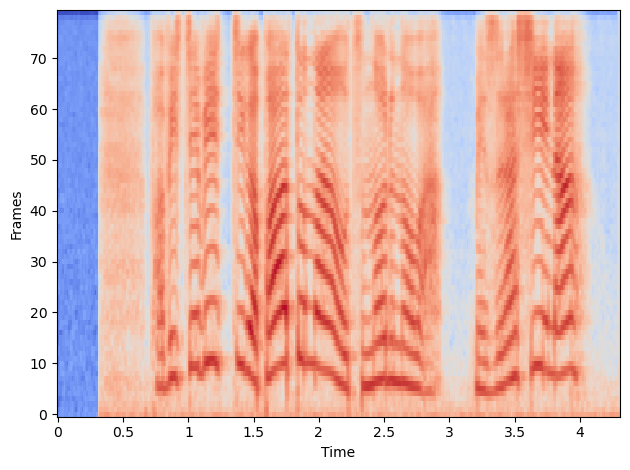

In [21]:
#fig, ax = plt.subplots(len(out_feats), 1, figsize=(8,10), sharex=True, sharey=True)
import librosa.display
import matplotlib.pyplot as plt

sr = 16000
hop_length = int(sr * 0.0125)
mesh = librosa.display.specshow(np.load(filelist[987]).T, sr=sr, x_axis="time", y_axis="frames", hop_length=hop_length)
plt.tight_layout()

In [11]:
import glob
import numpy as np

MEL_DIR = "F:/ROHAN4600マルチモーダルデータベース/mel_data/*"
IMG_DIR = "F:/ROHAN4600マルチモーダルデータベース/img_data/*"

OUTPUT_PATH = "F:/ROHAN4600マルチモーダルデータベース/img_data2/"

mellist = sorted(glob.glob(MEL_DIR))
imglist = sorted(glob.glob(IMG_DIR))

def fix_image_len(img, img_len, mel_len):
    """
    画像データの長さをメルスペクトログラムの長さに合わせる
    
    """
    index = 0
    
    for i in range(mel_len):
        if (index+1) * mel_len / img_len < i:
            index += 1
        
        if i == 0:
            new_img = img[index][np.newaxis, :]
        else:
            new_img = np.concatenate([new_img, img[index][np.newaxis, :]])
        
    return new_img

all = len(mellist)
for i in range(len(mellist)):
    mel = np.load(mellist[i])
    img = np.load(imglist[i])
    video = fix_image_len(img, len(img), len(mel))
    
    #print(video.shape)
    #print(mel.shape)
    
    filename = os.path.splitext(imglist[i])
    filename = os.path.basename(filename[0])
    savedir = OUTPUT_PATH + filename + ".npy"
    #print(savedir)
    
    np.save(savedir, video)
    
    if i%100 == 0:
        print(i, "/", all)


0 / 4600
100 / 4600
200 / 4600
300 / 4600
400 / 4600
500 / 4600
600 / 4600
700 / 4600
800 / 4600
900 / 4600
1000 / 4600
1100 / 4600
1200 / 4600
1300 / 4600
1400 / 4600
1500 / 4600
1600 / 4600
1700 / 4600
1800 / 4600
1900 / 4600
2000 / 4600
2100 / 4600
2200 / 4600
2300 / 4600
2400 / 4600
2500 / 4600
2600 / 4600
2700 / 4600
2800 / 4600
2900 / 4600
3000 / 4600
3100 / 4600
3200 / 4600
3300 / 4600
3400 / 4600
3500 / 4600
3600 / 4600
3700 / 4600
3800 / 4600
3900 / 4600
4000 / 4600
4100 / 4600
4200 / 4600
4300 / 4600
4400 / 4600
4500 / 4600


In [8]:
print(mellist[0])

F:/ROHAN4600マルチモーダルデータベース/mel_data\ROHAN4600_0001.npy


In [17]:
import glob
import numpy as np

MEL_DIR = "F:/ROHAN4600マルチモーダルデータベース/mel_data/*"
IMG_DIR = "F:/ROHAN4600マルチモーダルデータベース/img_data2/*"

mellist = sorted(glob.glob(MEL_DIR))
imglist = sorted(glob.glob(IMG_DIR))

In [21]:
i = 874

print(np.load(mellist[i]).shape)
print(np.load(imglist[i]).shape)

(441, 80)
(441, 512)


In [16]:
import glob
import numpy as np

MEL_DIR = "F:/ROHAN4600マルチモーダルデータベース/mel_data/*"
IMG_DIR = "F:/ROHAN4600マルチモーダルデータベース/img_data/*"

mellist = sorted(glob.glob(MEL_DIR))
imglist = sorted(glob.glob(IMG_DIR))
i = 1

print(np.load(mellist[i]).shape)
print(np.load(imglist[i]).shape)

(572, 80)
(214, 512)


# 出力メルの確認

In [12]:
MEL_PATH = "F:/ROHAN4600マルチモーダルデータベース/mel_outs/"
outspath = MEL_PATH + "outs_8.npy"
outsfinepath = MEL_PATH + "outs_fine_8.npy"
melpath = MEL_PATH + "mel_8.npy"
textpath = MEL_PATH + "text_5.npy"

In [13]:
import numpy as np

outs = np.load(outspath)
outsfine = np.load(outsfinepath)
mel = np.load(melpath)
text = np.load(textpath)

In [14]:
print(outs.squeeze().shape)

(762, 80)


In [15]:
print(text)

[[ 1  6 11  4  7  7 22 17 16 17  6  3 11 28  3 11  6  7 18  3 23 16 23 16
  27  7 21 31 22 17 18 11 22 21  7  5 14 22 11  9  3 22 17 20  3  4 23 20
  11 18  3 23  5 10  7  3 18  3  3 21 17 30  9  3  4  3 17 15  3 20 23 13
  23 17 21  3 15  7 22  3  2]]


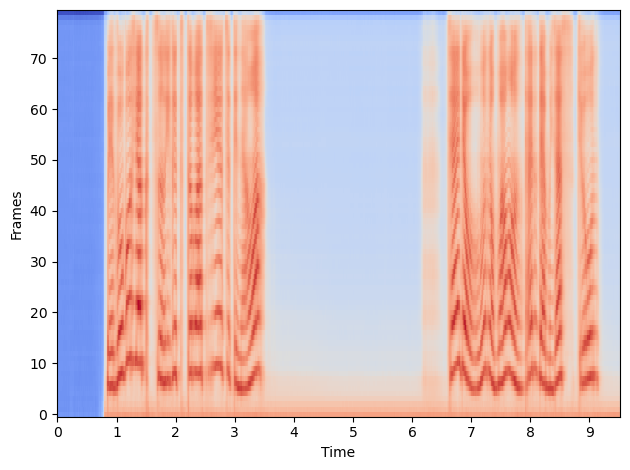

In [16]:
import librosa.display
import matplotlib.pyplot as plt

sr = 16000
hop_length = int(sr * 0.0125)
mesh = librosa.display.specshow(outsfine.squeeze().T, sr=sr, x_axis="time", y_axis="frames", hop_length=hop_length)
plt.tight_layout()

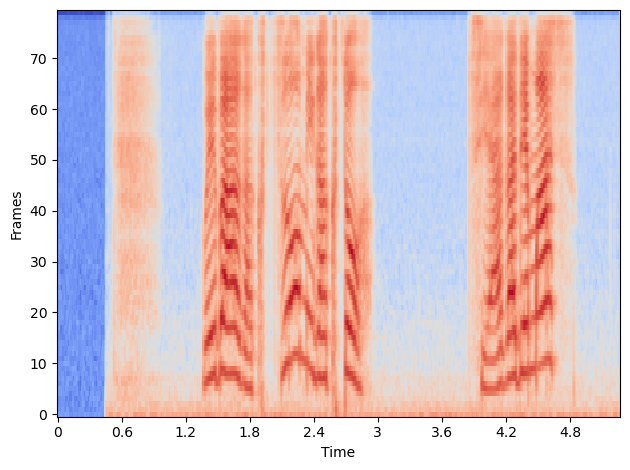

In [17]:
import librosa.display
import matplotlib.pyplot as plt

sr = 16000
hop_length = int(sr * 0.0125)
mesh = librosa.display.specshow(mel.squeeze().T, sr=sr, x_axis="time", y_axis="frames", hop_length=hop_length)
plt.tight_layout()

In [48]:
# 語彙の定義
characters = "abcdefghijklmnopqrstuvwxyzINU"
# その他特殊記号
extra_symbols = [
    "^",  # 文の先頭を表す特殊記号 <SOS>
    "$",  # 文の末尾を表す特殊記号 <EOS>
]
_pad = "~"

# NOTE: パディングを 0 番目に配置
symbols = [_pad] + extra_symbols + list(characters)

# 文字列⇔数値の相互変換のための辞書
_symbol_to_id = {s: i for i, s in enumerate(symbols)}
_id_to_symbol = {i: s for i, s in enumerate(symbols)}

In [49]:
seq = []
seq += [_id_to_symbol[s] for s in text.squeeze()]
print(seq)

['^', 'd', 'i', 'b', 'e', 'e', 't', 'o', 'n', 'o', 'd', 'a', 'i', 'z', 'a', 'i', 'd', 'e', 'p', 'a', 'u', 'n', 'u', 'n', 'y', 'e', 's', 'U', 't', 'o', 'p', 'i', 't', 's', 'e', 'c', 'l', 't', 'i', 'g', 'a', 't', 'o', 'r', 'a', 'b', 'u', 'r', 'i', 'p', 'a', 'u', 'c', 'h', 'e', 'a', 'p', 'a', 'a', 's', 'o', 'N', 'g', 'a', 'b', 'a', 'o', 'm', 'a', 'r', 'u', 'k', 'u', 'o', 's', 'a', 'm', 'e', 't', 'a', '$']


In [8]:
def plot_melspectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

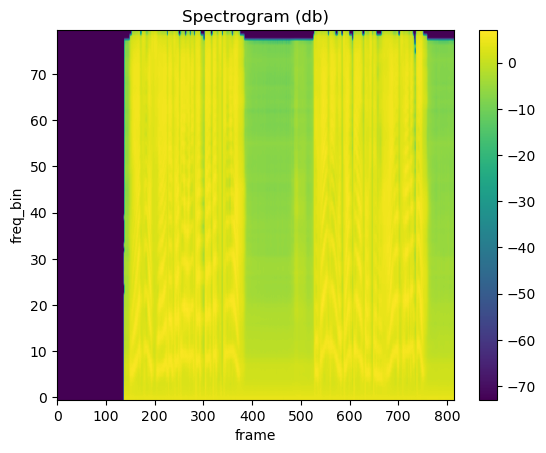

In [23]:
plot_melspectrogram(outs.T)